In [3]:
import tifffile as tif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, glob, json, csv

In [2]:
lightsheet_src='/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/'
sigma_in_matlas = tif.imread(os.path.join(lightsheet_src,'output_dirs/SIGMA_sagittal_ann_in_matlas/sigma_ann_in_matlas.tif'))
sigma_jacs_in_matlas = tif.imread(os.path.join(lightsheet_src,'tiffs/sigma_netdefo_matlas.tif'))

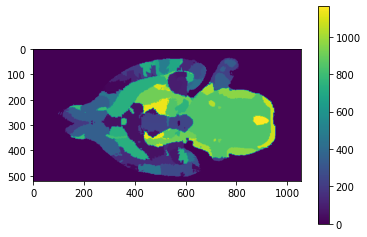

In [9]:
plt.imshow(sigma_in_matlas[:,:,200])
plt.colorbar()

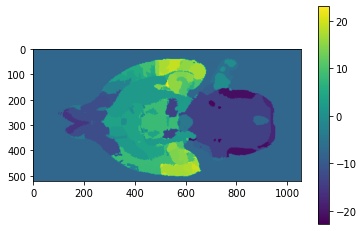

In [7]:
plt.imshow(sigma_jacs_in_matlas[:,:,200])
plt.colorbar()

In [14]:
# get PRA IDs for sigma vals
# first get sigma/pra csv
sigma_labels = pd.read_csv(os.path.join(lightsheet_src,'labels/SIGMA_in_PRA.csv'))
sigma_labels

,Unnamed: 0,atlas,ID,name,common_name,label,praid,structure_id_path
0,0,Tohoku,11,agranular_dysgranular_insular_cortex,insular_cortex,Agranular Dysgranular Insular Cortex,150,/0/37/59/150
1,1,Tohoku,12,agranular_dysgranular_insular_cortex,insular_cortex,Agranular Dysgranular Insular Cortex,150,/0/37/59/150
2,2,Tohoku,21,agranular_insular_cortex,agranular_insular_cortex,Agranular Insular Cortex,232,/0/37/59/150/232
3,3,Tohoku,22,agranular_insular_cortex,agranular_insular_cortex,Agranular Insular Cortex,232,/0/37/59/150/232
4,4,Tohoku,31,amygdalohyppocampic_area,amygdalohippocampal_cortex,Amygdalohyppocampic Area,109,/0/37/567/109
...,...,...,...,...,...,...,...,...
229,229,Waxholm,1152,ventral_hippocampal_commissure,hippocampal_commissure,Ventral Hippocampal Commissure,163,/0/37/59/104/579/163
230,230,Waxholm,1161,periventricular_grey,periventricular_region,Periventricular Grey,211,/0/37/59/91/11/211
231,231,Waxholm,1162,periventricular_grey,periventricular_region,Periventricular Grey,211,/0/37/59/91/11/211
232,232,SIGMA,1171,ventricular_system,ventricular_systems,Ventricular System,3,/0/3


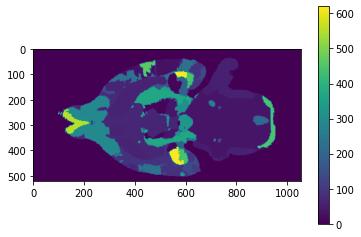

In [17]:
for idx in sigma_labels.index:
    sigma_in_matlas[sigma_in_matlas==int(sigma_labels.ID[idx])]=int(sigma_labels.praid[idx])

plt.imshow(sigma_in_matlas[:,:,200])
plt.colorbar()

In [19]:
sigma_labels.insert(7,'jacval',0)
sigma_labels       

,Unnamed: 0,atlas,ID,name,common_name,label,praid,jacval,structure_id_path
0,0,Tohoku,11,agranular_dysgranular_insular_cortex,insular_cortex,Agranular Dysgranular Insular Cortex,150,0,/0/37/59/150
1,1,Tohoku,12,agranular_dysgranular_insular_cortex,insular_cortex,Agranular Dysgranular Insular Cortex,150,0,/0/37/59/150
2,2,Tohoku,21,agranular_insular_cortex,agranular_insular_cortex,Agranular Insular Cortex,232,0,/0/37/59/150/232
3,3,Tohoku,22,agranular_insular_cortex,agranular_insular_cortex,Agranular Insular Cortex,232,0,/0/37/59/150/232
4,4,Tohoku,31,amygdalohyppocampic_area,amygdalohippocampal_cortex,Amygdalohyppocampic Area,109,0,/0/37/567/109
...,...,...,...,...,...,...,...,...,...
229,229,Waxholm,1152,ventral_hippocampal_commissure,hippocampal_commissure,Ventral Hippocampal Commissure,163,0,/0/37/59/104/579/163
230,230,Waxholm,1161,periventricular_grey,periventricular_region,Periventricular Grey,211,0,/0/37/59/91/11/211
231,231,Waxholm,1162,periventricular_grey,periventricular_region,Periventricular Grey,211,0,/0/37/59/91/11/211
232,232,SIGMA,1171,ventricular_system,ventricular_systems,Ventricular System,3,0,/0/3


In [35]:
for idx in sigma_labels.index:
    i = int(sigma_labels.praid[idx])
    print(" i is {}".format(i))
    try: 
        sigma_labels.jacval[idx]=sigma_jacs_in_matlas[sigma_in_matlas==i][0]
    except:
        sigma_labels.jacval[idx]=np.nan

 i is 150
 i is 150
 i is 232


/tmp/ipykernel_235940/1953629527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigma_labels.jacval[idx]=sigma_jacs_in_matlas[sigma_in_matlas==i][0]


 i is 232
 i is 109
 i is 109
 i is 347
 i is 347
 i is 66
 i is 66
 i is 368
 i is 368
 i is 620
 i is 620
 i is 7
 i is 7
 i is 8
 i is 8
 i is 193
 i is 193
 i is 239
 i is 239
 i is 235
 i is 235
 i is 234
 i is 234
 i is 92
 i is 92
 i is 194
 i is 194
 i is 93
 i is 93
 i is 370
 i is 370
 i is 291
 i is 291
 i is 291
 i is 291
 i is 98
 i is 98
 i is 28
 i is 28
 i is 55
 i is 55
 i is 65
 i is 65
 i is 327
 i is 327
 i is 140
 i is 140
 i is 92
 i is 92
 i is 140
 i is 140
 i is 240
 i is 240
 i is 555
 i is 555
 i is 142
 i is 142
 i is 240
 i is 240
 i is 551


/tmp/ipykernel_235940/1953629527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigma_labels.jacval[idx]=np.nan
/home/emilyjanedennis/.local/lib/python3.8/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


 i is 551
 i is 551
 i is 551
 i is 54
 i is 54
 i is 291
 i is 291
 i is 239
 i is 239
 i is 436
 i is 436
 i is 379
 i is 379
 i is 379
 i is 379
 i is 379
 i is 379
 i is 317
 i is 317
 i is 95
 i is 95
 i is 95
 i is 95
 i is 95
 i is 95
 i is 232
 i is 232
 i is 77
 i is 77
 i is 438
 i is 438
 i is 318
 i is 318
 i is 28
 i is 28
 i is 91
 i is 91
 i is 463
 i is 463
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 96
 i is 97
 i is 97
 i is 97
 i is 97
 i is 97
 i is 97
 i is 442
 i is 442
 i is 241
 i is 241
 i is 241
 i is 241
 i is 30
 i is 30
 i is 30
 i is 30
 i is 91
 i is 91
 i is 464
 i is 464
 i is 465
 i is 465
 i is 61
 i is 61
 i is 441
 i is 441
 i is 310
 i is 310
 i is 64
 i is 64
 i is 98
 i is 98
 i is 161
 i is 161
 i is 68
 i is 68
 i is 70
 i is 70
 i is 71
 i is 71
 i is 117
 i is 117
 i is 360
 i is 360
 i is 35
 i is 35
 i is 530


In [34]:
i=551
sigma_jacs_in_matlas[sigma_in_matlas==i]

array([], dtype=float32)

In [30]:
sigma_labels[sigma_labels.index==60]

,Unnamed: 0,atlas,ID,name,common_name,label,praid,jacval,structure_id_path
60,60,Tohoku,311,medial_parietal_associative_cortex,parietal_association_cortex,Medial Parietal Associative Cortex,240,0,/0/37/59/240


In [32]:
sigma_jacs_in_matlas[sigma_in_matlas==240]

array([9.96385, 9.96385, 9.96385, ..., 9.96385, 9.96385, 9.96385],
      dtype=float32)

/home/emilyjanedennis/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/emilyjanedennis/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([12.,  6., 20.,  8., 26., 24., 38., 44., 38., 12.]),
 array([-24.39752388, -19.65269012, -14.90785637, -10.16302261,
         -5.41818886,  -0.6733551 ,   4.07147865,   8.81631241,
         13.56114616,  18.30597992,  23.05081367]),
 <BarContainer object of 10 artists>)

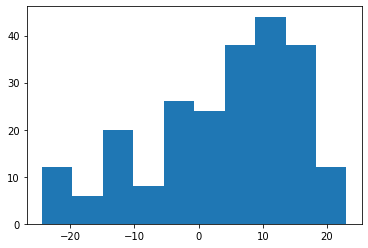

In [43]:
plt.hist(sigma_labels.jacval)